In [311]:
import sys
sys.path.append("/Users/ruinz/.pyenv/versions/3.9.5/lib/python3.9/site-packages")

In [312]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from IPython.display import clear_output


In [313]:

include_pos = ('NOUN', "VERB", "ADJ", "PROPN")
# include_pos = ("PROPN")
stopwords = ('する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 
              'ほう', "いる", "マイ", "ネット", "登録", "歌詞", "歌", "いく", "いい", "ら",
              "アーティスト", "匹", "まま", "しまう", "よい", "つく", "くれる", "POP", "twee")


In [314]:
list_df = pd.read_csv("./csv/sasakure.csv")

In [315]:
# list_df

In [316]:
# pd.set_option("display.max_rows", 100)
list_df.sort_values("発売日", inplace=True)
# print(list_df)
# list_df

In [317]:
all_lyrics_list = list_df["歌詞"].to_list()
all_lyrics_text = ""
for lyric in all_lyrics_list:
  all_lyrics_text = all_lyrics_text + lyric
# all_lyrics_text
print(len(all_lyrics_text))

13417


In [318]:
import spacy
import copy
# nlp = spacy.load("ja_ginza")
text = all_lyrics_text
nlp = spacy.load("ja_ginza")
words = []


def join_words_in_doc(text, include_pos, stopwords):
    print(f"all text length is {len(text)}")
    split_number = (len(text) // 15000) + 1
    words_list = []
    for i in range(1, split_number+1):
        texts = copy.deepcopy(text)
        texts = texts[15000*(i-1):min((15000*i), len(text))]
        print(len(texts))
        doc = nlp(texts)
        # df = pd.DataFrame({
        # 'text': token.text,
        # 'lemma_': token.lemma_,
        # 'pos_': token.pos_,
        # 'tag_': token.tag_,
        # 'dep_': token.dep_,
        # 'children': list(token.children)
        # } for token in doc)
        # from collections import Counter
        # counter = Counter(token.lemma_ for token in doc
        #     if token.pos_ in include_pos and token.lemma_ not in stopwords)
        words_list = words_list + ([token.lemma_ for token in doc if token.pos_ in include_pos and token.lemma_ not in stopwords])
        print(len(words_list))
    return(words_list)


#ここで時期を設定する。1から順に昔の歌詞。最大値は上のlen(all_lyrics_text)の出力結果に応じて調整
# duration = 2

# text = text[15000*(duration-1):min((15000*duration), len(text))]
# text = text[:100]
# doc = nlp(text)


# df = pd.DataFrame({
#     'text': token.text,
#     'lemma_': token.lemma_,
#     'pos_': token.pos_,
#     'tag_': token.tag_,
#     'dep_': token.dep_,
#     'children': list(token.children)
#     } for token in doc)

# print(len(text))

In [319]:
#歌詞に対して句点をつける
# all_lyrics_text = ""
# for sent in doc.sents: 
  # print(sent)
  # sent = str(sent)
  # all_lyrics_text = all_lyrics_text + sent
  # all_lyrics_text = all_lyrics_text + "。"

In [320]:
# all_lyrics_text

In [321]:
# from collections import Counter

In [322]:
# counter = Counter(token.lemma_ for token in doc
#                   if token.pos_ in include_pos and token.lemma_ not in stopwords)

# print('count word')
# for word, count in counter.most_common(5):
#      print(f'{count:>5} {word}')

In [323]:
!wget -c https://moji.or.jp/wp-content/ipafont/IPAexfont/IPAexfont00401.zip
!mkdir -p fonts
!unzip -d fonts -o IPAexfont00401.zip
!rm -f IPAexfont00401.zip
clear_output()

In [324]:
import re
import sys
sys.path.append("/Users/ruinz/.pyenv/versions/3.9.5/lib/python3.9/site-packages")
import matplotlib.pyplot as plt
import spacy
import wordcloud
%matplotlib inline

words = join_words_in_doc(text, include_pos, stopwords)

# print("ロボコップ" in words)

all text length is 13417
13417
2691


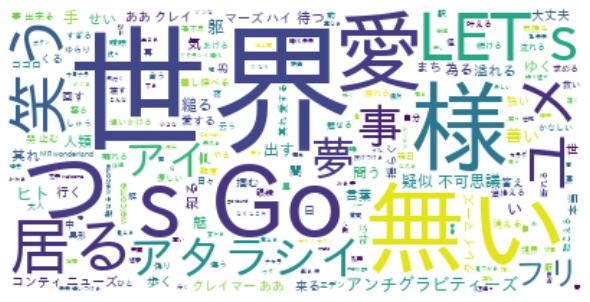

In [325]:



# words = [token.lemma_ for token in doc
#          if token.pos_ in include_pos and token.lemma_ not in stopwords]



wc = wordcloud.WordCloud(
    background_color='white',
    font_path='fonts/IPAexfont00401/ipaexg.ttf',
    max_font_size=100)
img = wc.generate(' '.join(words))

plt.figure(figsize=(8, 4))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [326]:
pd.set_option('display.max_colwidth',1000)
list_df[list_df['歌詞'].str.contains('マイフレンド')]

,Unnamed: 0,曲名,発売日,表示回数,歌詞
